#  Loan Data Exploration
## By (Mohammed Alqarni)
### Introduction
The Prosper Loan Data serves as a comprehensive repository capturing intricate details pertaining to peer-to-peer loans facilitated by Prosper, a prominent credit company. Within its contents lie a wealth of information encompassing loan status, terms, as well as borrower and lender particulars, all interwoven with financial metrics. The dataset's utility extends to the exploration of diverse loan characteristics, analysis of borrower behavior, and evaluation of overall loan performance. Presented in a structured tabular format, the data lends itself to insightful scrutiny through a blend of statistical methodologies and visual analyses, ultimately empowering stakeholders to draw informed conclusions and make sound decisions pertaining to lending practices.

## Data Wrangling

In the initial stages of data preparation, we delve into a dataset that elucidates the intricacies of loans brokered through the credit institution Prosper, focusing on the dynamics of peer-to-peer lending.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import pandas as pd
df = pd.read_csv('C:\\Users\\m30al\\Downloads\\prosperLoanData.csv')
df = pd.read_csv(r'C:\Users\m30al\Downloads\prosperLoanData.csv')
df.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.describe()

ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.004900        -0.182700   
25%         0.124200                 0.115670       0.042400         0.074080   
50%         0.173000                 0.161500       0.072400         0.091700   
75%         0.240000                 0.224300       0.112000         0.116600   
max         0.492500                 0.319900       0.366000         0.283700   

       ProsperRating (numeric)  ProsperScore  ...  LP_ServiceFees  \
count             84853.000000  84853.000000  ...   113937.000000   
mean                  4.072243      5.950067  ...      -54.725641   
std                   1.673227      2.376501  ...       60.675425   
min                   1.000000      1.000000  ...     -664.870000   
25%                   3.000000      4.000000  ...      -73.180000   
50%                   4.000000      6.000000  ...      -34.440000   
75%                   5.000000      8.000000  ...      -13.920000   
max                   7.000000     11.000000  ...       32.060000   

       LP_CollectionFees  LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
count      113937.000000          113937.000000        113937.000000   
mean          -14.242698             700.446342           681.420499   
std           109.232758            2388.513831          2357.167068   
min         -9274.750000             -94.200000          -954.550000   
25%             0.000000               0.000000             0.000000   
50%             0.000000               0.000000             0.000000   
75%             0.000000               0.000000             0.000000   
max             0.000000           25000.000000         25000.000000   

       LP_NonPrincipalRecoverypayments  PercentFunded  Recommendations  \
count                    113937.000000  113937.000000    113937.000000   
mean                         25.142686       0.998584         0.048027   
std                         275.657937       0.017919         0.332353   
min                           0.000000       0.700000         0.000000   
25%                           0.000000       1.000000         0.000000   
50%                           0.000000       1.000000         0.000000   
75%                           0.000000       1.000000         0.000000   
max                       21117.900000       1.012500        39.000000   

       InvestmentFromFriendsCount  InvestmentFromFriendsAmount      Investors  
count               113937.000000                113937.000000  113937.000000  
mean                     0.023460                    16.550751      80.475228  
std                      0.232412                   294.545422     103.239020  
min                      0.000000                     0.000000       1.000000  
25%                      0.000000                     0.000000       2.000000  
50%                      0.000000                     0.000000      44.000000  
75%                      0.000000                     0.000000     115.000000  
max                     33.000000                 25000.000000    1189.000000

In [5]:
df.sample(15)

ListingKey  ListingNumber            ListingCreationDate  \
6408    2E0A3589586878849817FA5         908812  2013-09-18 13:56:02.300000000   
56698   A7C03406036035191325645         236105  2007-11-23 05:38:05.637000000   
20996   475B354618427631949E59A         584774  2012-05-01 14:33:05.767000000   
74909   40D135812468194266C2917         818715  2013-06-22 20:34:09.673000000   
73583   E38535858469571337EB783         859908  2013-08-04 21:21:26.230000000   
76745   BAB036028162286766A54B3        1161472  2014-02-18 16:02:36.350000000   
46478   37D43432075307208E73F7D         396413  2008-09-10 21:35:40.697000000   
11993   8DF83590079604126BC535D         924951  2013-09-25 17:55:53.600000000   
912     7A41337257909407897EB67          61512  2006-11-14 08:23:08.430000000   
107826  21C33585770273528B65A4D         872076  2013-08-16 22:32:53.767000000   
7223    00883394559972599E77AEC         173853  2007-07-21 20:46:17.070000000   
37210   6E753422912586256FCA2EE         343867  2008-06-03 15:59:00.180000000   
37196   3A8B3409509264067BA623E         258413  2008-01-01 07:22:09.023000000   
95876   786E3583774660002DE26B7         836734  2013-07-11 18:52:52.083000000   
54361   A86E33868082600658F2206         124340  2007-04-16 12:58:29.020000000   

       CreditGrade  Term  LoanStatus           ClosedDate  BorrowerAPR  \
6408           NaN    36     Current                  NaN      0.28544   
56698            A    36   Completed  2010-12-04 00:00:00      0.09688   
20996          NaN    36     Current                  NaN      0.35797   
74909          NaN    36     Current                  NaN      0.26528   
73583          NaN    60     Current                  NaN      0.18852   
76745          NaN    60     Current                  NaN      0.24011   
46478            A    36   Completed  2009-07-20 00:00:00      0.15781   
11993          NaN    36     Current                  NaN      0.23898   
912             NC    36   Defaulted  2007-11-18 00:00:00      0.27276   
107826         NaN    36     Current                  NaN      0.13697   
7223             D    36   Completed  2009-07-27 00:00:00      0.19228   
37210           HR    36  Chargedoff  2009-03-15 00:00:00      0.34408   
37196            C    36  Chargedoff  2009-02-10 00:00:00      0.15783   
95876          NaN    36     Current                  NaN      0.27285   
54361            A    36   Completed  2009-01-23 00:00:00      0.09437   

        BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
6408          0.2469       0.2369  ...          -14.11                0.0   
56698         0.0900       0.0800  ...          -48.35                0.0   
20996         0.3177       0.3077  ...          -42.10                0.0   
74909         0.2272       0.2172  ...          -37.40                0.0   
73583         0.1649       0.1549  ...          -73.55                0.0   
76745         0.2150       0.2050  ...            0.00                0.0   
46478         0.1435       0.1335  ...          -63.57                0.0   
11993         0.2015       0.1915  ...          -39.66                0.0   
912           0.2600       0.2450  ...           -4.10                0.0   
107826        0.1089       0.0989  ...          -47.39                0.0   
7223          0.1850       0.1700  ...          -96.95                0.0   
37210         0.3200       0.3100  ...           -3.50                0.0   
37196         0.1507       0.1407  ...          -24.60                0.0   
95876         0.2346       0.2246  ...          -30.46                0.0   
54361         0.0875       0.0825  ...          -19.53                0.0   

        LP_GrossPrincipalLoss  LP_NetPrincipalLoss  \
6408                     0.00                 0.00   
56698                    0.00                 0.00   
20996                    0.00                 0.00   
74909                    0.00                 0.00   
73583                    0.00       

In [6]:
target_columns = ['Term', 
'LoanStatus', 
'BorrowerRate',
'ProsperRating (Alpha)', 
'ListingCategory (numeric)', 
'EmploymentStatus',     
'DelinquenciesLast7Years', 
'StatedMonthlyIncome', 
'TotalProsperLoans',
'LoanOriginalAmount',  
'LoanOriginationDate',
'Recommendations', 
'Investors']

In [7]:
target_df = df.loc[:, target_columns].copy()

In [8]:
target_sample = target_df.sample(10)

In [9]:
print(target_df.sample(10))

        Term  LoanStatus  BorrowerRate ProsperRating (Alpha)  \
110265    36   Completed        0.1518                   NaN   
49627     36     Current        0.2712                     E   
111737    36   Completed        0.1800                   NaN   
10030     36  Chargedoff        0.1000                   NaN   
66727     36   Completed        0.3199                     E   
64927     36     Current        0.1970                     C   
20514     36     Current        0.0890                     A   
95684     36   Completed        0.1739                   NaN   
65439     36     Current        0.1089                     A   
83530     36     Current        0.1970                     C   

        ListingCategory (numeric) EmploymentStatus  DelinquenciesLast7Years  \
110265                          0        Full-time                      0.0   
49627                           3    Self-employed                      0.0   
111737                          0        Full-time        

Given that Prosper has employed its proprietary Prosper Rating exclusively since 2009, we encounter numerous instances of missing values within the ProsperRating column. To address this, we'll proceed by removing these missing values.

In [10]:
info_target_df = target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
 11  Recommendations            113937 non-null  int64  
 12  Investors                  113937 non-null  int64  
dtypes: float64(4), int64(5), obje

In [11]:
summary_target_df = target_df.describe()
print(target_df.describe())

                Term   BorrowerRate  ListingCategory (numeric)  \
count  113937.000000  113937.000000              113937.000000   
mean       40.830248       0.192764                   2.774209   
std        10.436212       0.074818                   3.996797   
min        12.000000       0.000000                   0.000000   
25%        36.000000       0.134000                   1.000000   
50%        36.000000       0.184000                   1.000000   
75%        36.000000       0.250000                   3.000000   
max        60.000000       0.497500                  20.000000   

       DelinquenciesLast7Years  StatedMonthlyIncome  TotalProsperLoans  \
count            112947.000000         1.139370e+05       22085.000000   
mean                  4.154984         5.608026e+03           1.421100   
std                  10.160216         7.478497e+03           0.764042   
min                   0.000000         0.000000e+00           0.000000   
25%                   0.000000     

Due to the implementation of Prosper's proprietary Prosper Rating solely from 2009 onward, the ProsperRating column contains a substantial number of missing values. To handle this, we'll take the approach of eliminating these missing values.

In [12]:
target_df = target_df[target_df['ProsperRating (Alpha)'].notna()].reset_index(drop=True)

In [13]:
target_df['LoanOriginationDate'] = target_df['LoanOriginationDate'].apply(pd.to_datetime)

In [14]:
target_df['TotalProsperLoans'].fillna(0, inplace=True)

In [15]:
print(target_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Term                       84853 non-null  int64         
 1   LoanStatus                 84853 non-null  object        
 2   BorrowerRate               84853 non-null  float64       
 3   ProsperRating (Alpha)      84853 non-null  object        
 4   ListingCategory (numeric)  84853 non-null  int64         
 5   EmploymentStatus           84853 non-null  object        
 6   DelinquenciesLast7Years    84853 non-null  float64       
 7   StatedMonthlyIncome        84853 non-null  float64       
 8   TotalProsperLoans          84853 non-null  float64       
 9   LoanOriginalAmount         84853 non-null  int64         
 10  LoanOriginationDate        84853 non-null  datetime64[ns]
 11  Recommendations            84853 non-null  int64         
 12  Inve

### Q1. What features are you specifically focused on investigating in your dataset?
I'm interested in identifying elements that serve as predictors for credit default and delving into the prominent factors that influence Prosper credit ratings.

## Firest: Univariate Exploration
### Overview of Loan Status

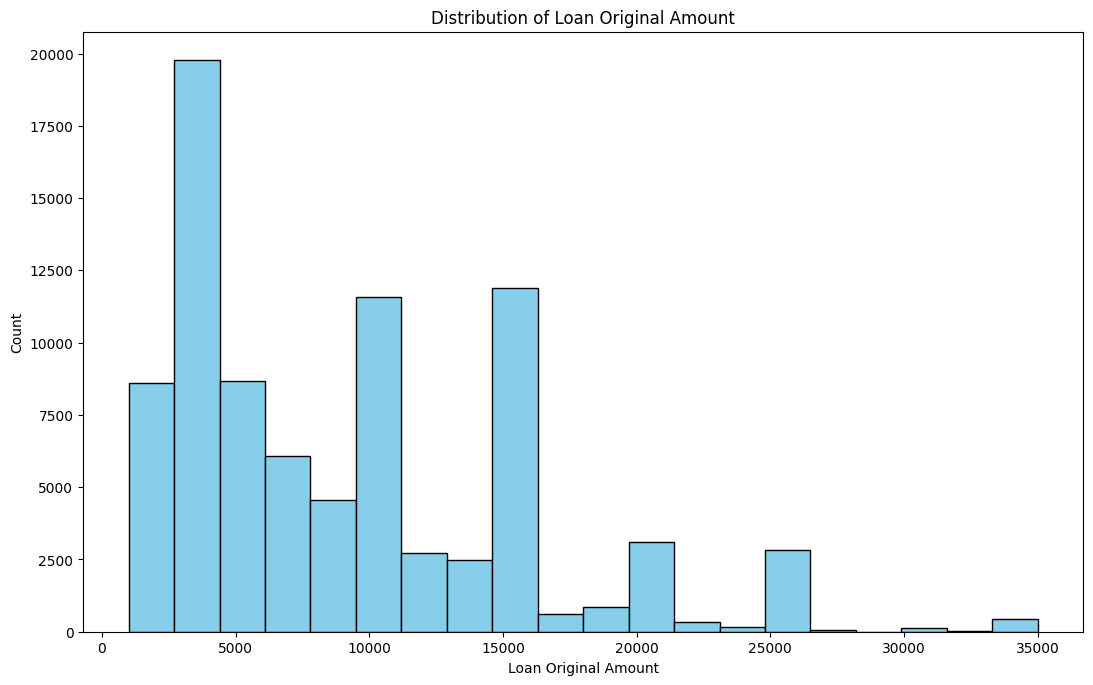

In [16]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure(figsize=(10, 6))
ax = fig.add_axes([0, 0, 1, 1])
plot_color = 'skyblue'
ax.hist(target_df['LoanOriginalAmount'], color=plot_color, bins=20, edgecolor='black')
ax.set(xlabel='Loan Original Amount', ylabel='Count', title='Distribution of Loan Original Amount')
plt.show()

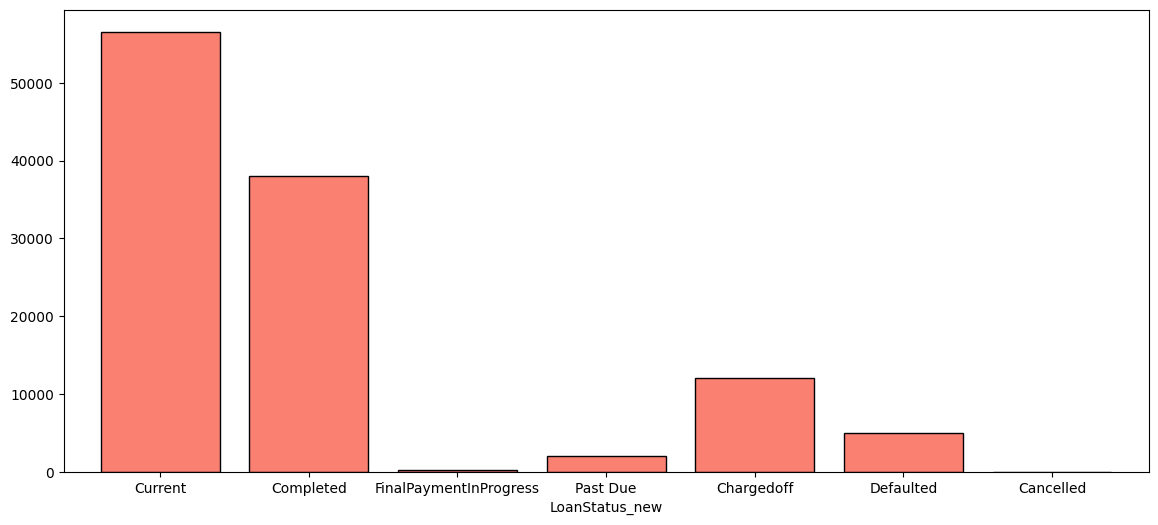

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Make a copy of the dataframe
df_copy = df.copy()

# Convert 'LoanStatus' to a non-categorical type
df_copy['LoanStatus'] = df_copy['LoanStatus'].astype(str)

# Replace missing values in 'LoanStatus' with an empty string
df_copy['LoanStatus'].fillna('', inplace=True)

# Change values containing 'Past Due' to 'Past Due'
mask = df_copy['LoanStatus'].str.contains("Past Due", na=False)
df_copy['LoanStatus_new'] = df_copy['LoanStatus']
df_copy.loc[mask, 'LoanStatus_new'] = "Past Due"

# Convert 'LoanStatus' and 'LoanStatus_new' back to a categorical type
df_copy['LoanStatus'] = df_copy['LoanStatus'].astype('category')
df_copy['LoanStatus_new'] = df_copy['LoanStatus_new'].astype('category')

# Define ordinal variable dictionary
ordinal_var_dict = {
    'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999',
                    '$75,000-99,999', '$100,000+', 'Not displayed', 'nan'],
    'LoanStatus_new': ['Current', 'Completed', 'FinalPaymentInProgress',
                       'Past Due', 'Chargedoff', 'Defaulted', 'Cancelled']
}

# Convert variables to ordered categorical dtype
for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered=True, categories=ordinal_var_dict[var])
    df_copy[var] = df_copy[var].astype(ordered_var)

# Plot the bar chart with a specified color ('pink')
plot_color = 'salmon'
df_copy['LoanStatus_new'].value_counts().sort_index().plot.bar(edgecolor='black', figsize=[14, 6], rot=0, width=0.8, color=plot_color)
plt.show()


## Overview of employee Status

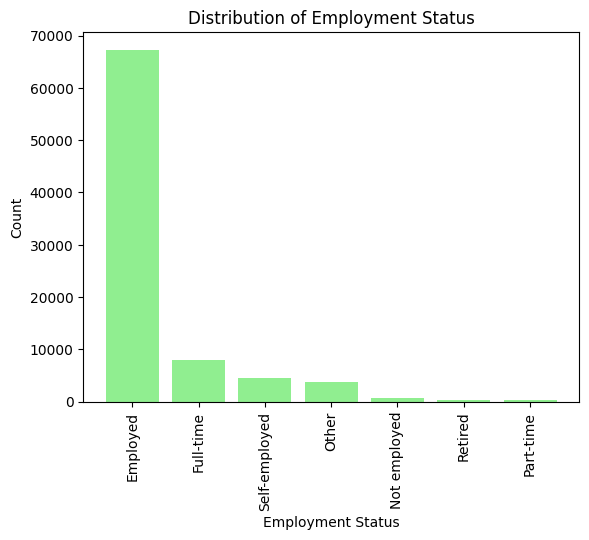

In [18]:
import matplotlib.pyplot as plt
plot_color = 'lightgreen'
plt.bar(target_df['EmploymentStatus'].value_counts().index, target_df['EmploymentStatus'].value_counts(), color=plot_color)
plt.xticks(rotation=90)
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.title('Distribution of Employment Status')
plt.show()

## Insights into Stated Month Income

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(target_df['StatedMonthlyIncome'], bins=1000, color='skyblue', edgecolor='black')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Frequency')
plt.title('Distribution of Stated Monthly Income')
plt.show()

##### Data Visualization

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(target_df['StatedMonthlyIncome'], bins=1000, range=(0, 5000), color='skyblue', edgecolor='black')
plt.xlabel('Stated Monthly Income')
plt.ylabel('Frequency')
plt.title('Distribution of Stated Monthly Income')
plt.show()

Insight 1:

- Predominantly, borrowers are managing their payments well, with a substantial number having current loan statuses.
- Loans that were past due are categorized based on the duration of payment delays.
- A noteworthy proportion of loans have been successfully completed.

Insight 2:

- The dataset primarily comprises current loans, indicating a majority of borrowers are maintaining timely payments.
- Past due loans are diversified based on the extent of payment delay.
- Completed loans represent a significant portion, while defaulted loans constitute a minority, and charged-off loans also make up a substantial share.

Insight 3:

- Employment status distribution reveals that the majority of borrowers are employed, with other categories representing a smaller proportion.
- Within the small subset, full-time employment has the highest representation, followed by self-employed and other categories in descending order.

Insight 4:

- Applying a boundary of the mean plus three times the standard deviation to the distribution of monthly income reveals a persistent right skew. However, the mode becomes more evident, clustering around the 5000 mark.

##### Varied Income Dynamics: Outliers, Employment Composition, and Current Loan Prevalence. 

##### Uncovering Patterns: Noteworthy Presence of Current Loans Alters Focus on Investigating Key Drivers.

## Second: Bivariate Exploration

In [21]:
import pandas as pd
valid_statuses = ['Completed', 'Defaulted', 'Chargedoff']
target_df = target_df[target_df['LoanStatus'].isin(valid_statuses)]
target_df['LoanStatus'] = target_df['LoanStatus'].replace({'Chargedoff': 'Defaulted'})
loan_status_counts = target_df['LoanStatus'].value_counts()
print(loan_status_counts)

LoanStatus
Completed    19664
Defaulted     6341
Name: count, dtype: int64


## Dataset Transformation: A New Perspective Emerges

In [22]:
import pandas as pd
categories = {1: 'Debt Consolidation', 2: 'Home Improvement', 3: 'Business', 6: 'Auto', 7: 'Other'}
target_df['ListingCategory (numeric)'] = target_df['ListingCategory (numeric)'].map(categories).fillna('Other')
listing_category_counts = target_df['ListingCategory (numeric)'].value_counts()
print(listing_category_counts)

ListingCategory (numeric)
Debt Consolidation    12740
Other                  7083
Home Improvement       2612
Business               2366
Auto                   1204
Name: count, dtype: int64


Insight:

Following the transformation of the 'ListingCategory (numeric)' column using a predefined mapping, a distinct categorization emerges. The most prevalent loan category is "Debt Consolidation," constituting a substantial portion of the dataset. Other notable categories include "Other," "Home Improvement," "Business," and "Auto." This provides a clearer understanding of the distribution of loan categories within the dataset, facilitating more targeted analyses.

## Classification:

In [23]:
sns.scatterplot(data=df, x='BorrowerAPR', y='BorrowerRate')
plt.xlabel('Borrower APR')
plt.ylabel('Borrower Rate')
plt.title('Relationship between Borrower APR and Borrower Rate')
plt.show()

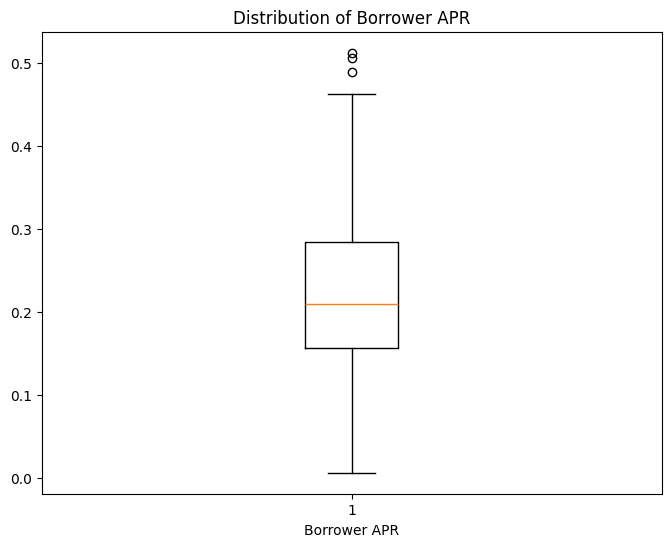

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(8, 6))
ax.boxplot(df['BorrowerAPR'].dropna())
ax.set(xlabel='Borrower APR', title='Distribution of Borrower APR')
plt.show()

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of ProsperRating (Alpha)
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

fig, ax = plt.subplots(figsize=(10, 6))
color_palette = 'Blues'

# Use ordered categories and set order explicitly
ordered_cats = pd.CategoricalDtype(categories=prosper_rating_order, ordered=True)
target_df['ProsperRating (Alpha)'] = target_df['ProsperRating (Alpha)'].astype(ordered_cats)

target_df.groupby(['LoanStatus', 'ProsperRating (Alpha)']).size().unstack().plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)
ax.set(xlabel='Loan Status', ylabel='Count', title='Loan Status by Prosper Rating')
plt.show()


C:\Users\m30al\AppData\Local\Temp\ipykernel_76244\3070905769.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_df.groupby(['LoanStatus', 'ProsperRating (Alpha)']).size().unstack().plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)


## Correlation Between Credit Commencement and Listing Category

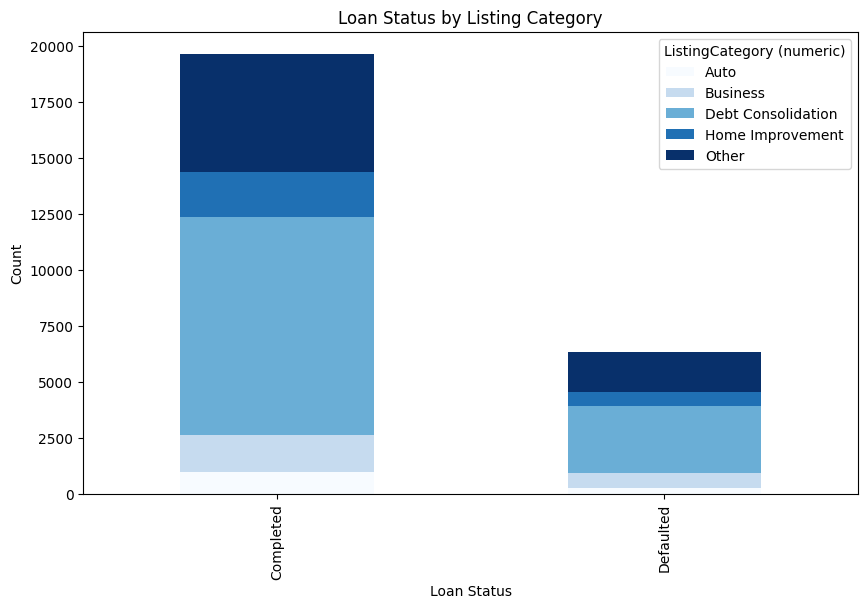

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10, 6))
color_palette = 'Blues'
target_df.groupby(['LoanStatus', 'ListingCategory (numeric)']).size().unstack().plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)
ax.set(xlabel='Loan Status', ylabel='Count', title='Loan Status by Listing Category')
plt.show()

## Exploring the Relationship Between Loan Status and Loan Amount

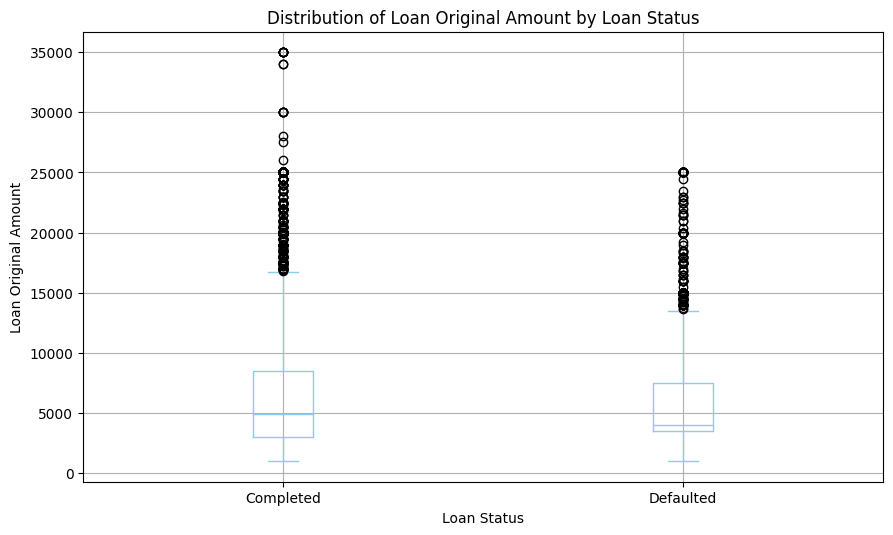

In [27]:
import matplotlib.pyplot as plt
# size
fig, ax = plt.subplots(figsize=(10, 6))
# base color
base_color = 'skyblue'
# boxplot
target_df.boxplot(column='LoanOriginalAmount', by='LoanStatus', ax=ax, color=base_color)
# labels and title for better clarity
ax.set(xlabel='Loan Status', ylabel='Loan Original Amount', title='Distribution of Loan Original Amount by Loan Status')
# Display the plot
plt.suptitle('') 
plt.show()

## Unraveling the Interplay Between Prosper Rating and Employment Status

C:\Users\m30al\AppData\Local\Temp\ipykernel_76244\2859788597.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  target_df.groupby(['ProsperRating (Alpha)', 'EmploymentStatus']).size().unstack().plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)


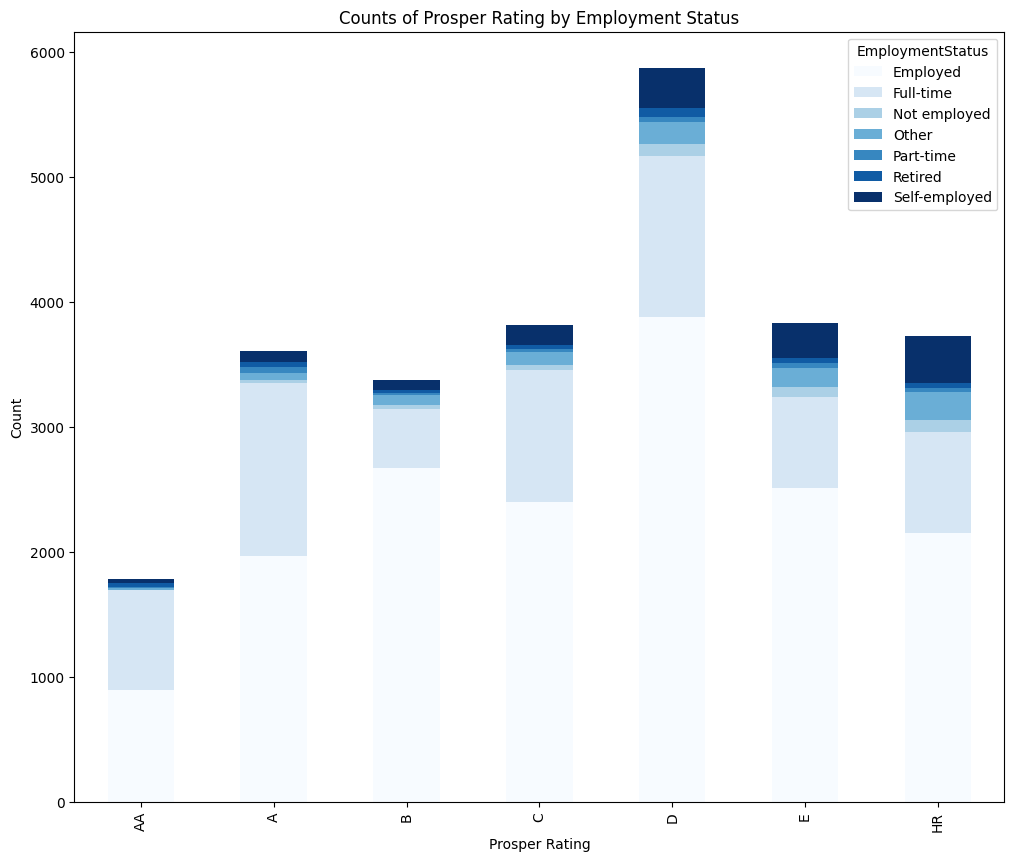

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of ProsperRating (Alpha)
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

# Set the order of ProsperRating (Alpha) as ordered categorical
ordered_cats = pd.CategoricalDtype(categories=prosper_rating_order, ordered=True)
target_df['ProsperRating (Alpha)'] = target_df['ProsperRating (Alpha)'].astype(ordered_cats)

# Size of the plot
fig, ax = plt.subplots(figsize=(12, 10))

# Color palette
color_palette = 'Blues'

# Bar plot
target_df.groupby(['ProsperRating (Alpha)', 'EmploymentStatus']).size().unstack().plot(kind='bar', stacked=True, ax=ax, colormap=color_palette)

# Clarity
ax.set(xlabel='Prosper Rating', ylabel='Count', title='Counts of Prosper Rating by Employment Status')

# Display the plot
plt.show()


* Insight 1:

Significantly, defaulted loans display a notable concentration in the rating range between 0.1 and 0.4.
* Insight 2:

The majority of defaulted loans are observed to have ratings ranging from 0.1 to 0.3.
* Insight 3:

The rating 'D' emerges as the most frequent among defaulted loans. Likewise, 'D' is the predominant rating for completed loans, followed by other ratings such as 'A'.
* Insight 4:

When examining both graphs, the loan category 'Debt Consolidation' stands out with the highest frequency among loan types.
* Insight 5:

Comparing defaulted and completed credits, the former tend to have smaller loan amounts than the latter.
* Insight 6:

Lower ratings demonstrate a higher proportion of individuals with employment statuses like Not Employed, Self-employed, Retired, and Part-Time.

Insight:

1. Loan status exhibits a noteworthy distinction in loan amounts, with defaulted credits generally being smaller compared to completed credits.

2. Employment status reveals a correlation with lower ratings, showing a prevalence of 'Not employed', 'Self-employed', 'Retired', and 'Part-time' individuals.

These findings illuminate key relationships within the dataset, shedding light on the dynamics between loan outcomes, loan amounts, and employment statuses.

Insight:
1. A notable observation includes the prevalence of Prosper rating 'D' among defaulted credits, suggesting a potential correlation between specific ratings and loan outcomes.

## Thered: Multivariate Exploration
### Classification, Loan Amount, and Status

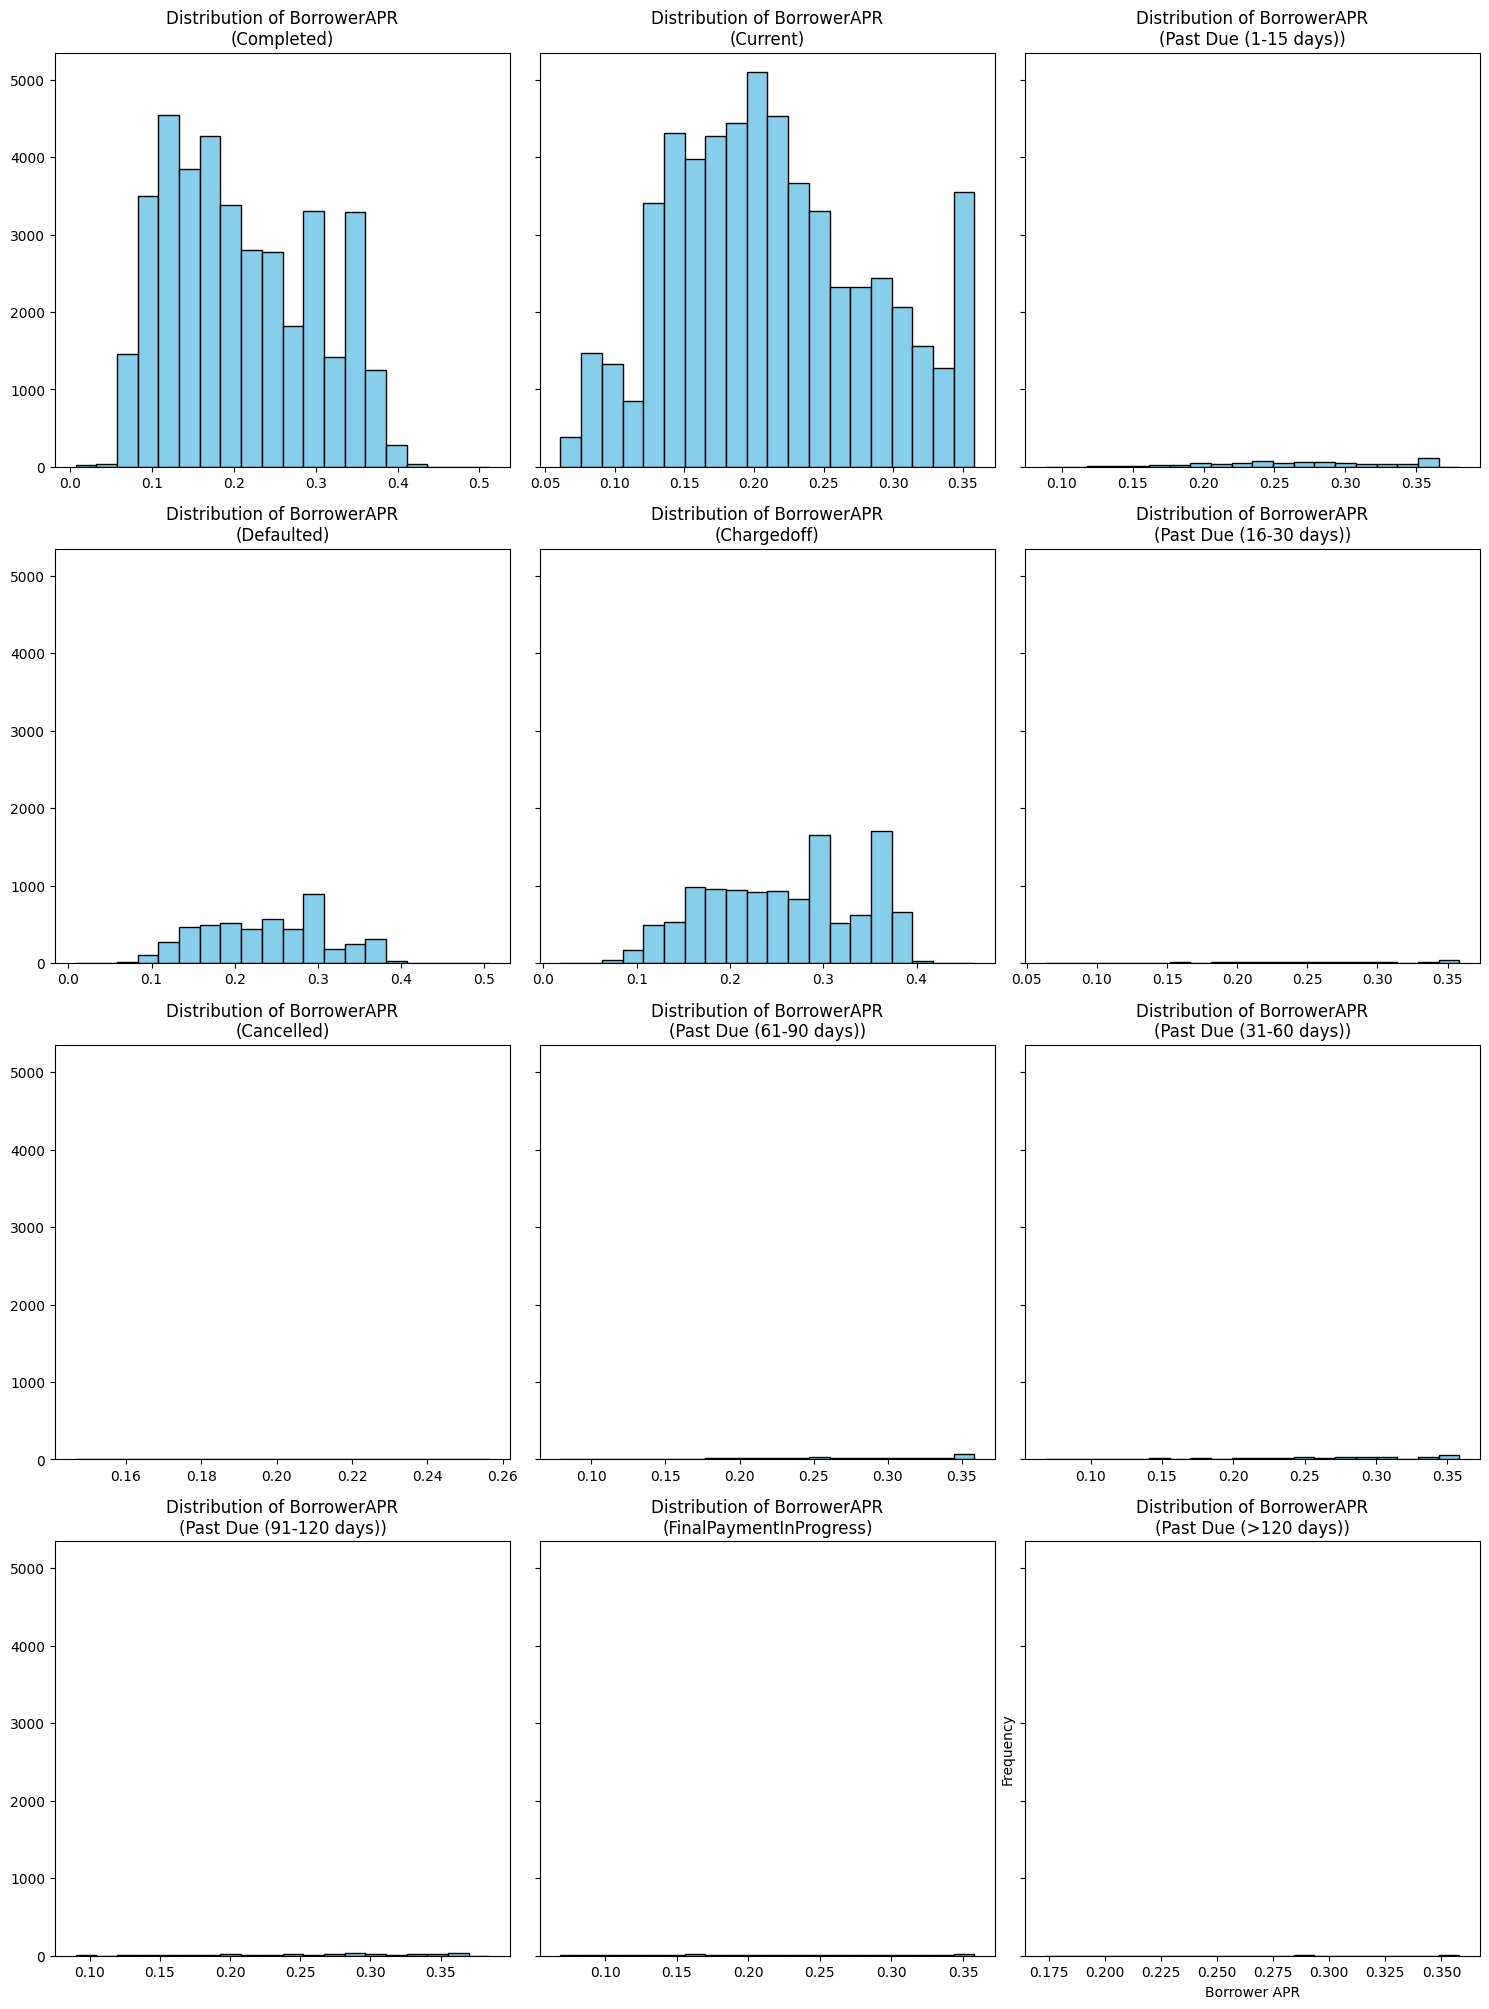

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
# Get unique LoanStatus categories
unique_loan_status = df['LoanStatus'].unique()
# Calculate the number of rows and columns for subplots
num_rows = len(unique_loan_status) // 3 + (len(unique_loan_status) % 3 > 0)
num_cols = min(len(unique_loan_status), 3)
# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, num_rows * 5), sharey=True)
# Flatten the axes array to simplify indexing
axes = axes.flatten()
# LoanStatus categories
for i, loan_status in enumerate(unique_loan_status):
    subset_data = df[df['LoanStatus'] == loan_status]
    # Determine the current subplot index
    ax_index = i if num_rows == 1 else (i // num_cols) * num_cols + (i % num_cols)
    # Plot on the current subplot
    axes[ax_index].hist(subset_data['BorrowerAPR'], bins=20, color='skyblue', edgecolor='black')
    axes[ax_index].set_title(f'Distribution of BorrowerAPR\n({loan_status})')
# Adjust layout
plt.tight_layout()
# Common labels for all subplots
plt.xlabel('Borrower APR')
plt.ylabel('Frequency')
# Show the plot
plt.show()

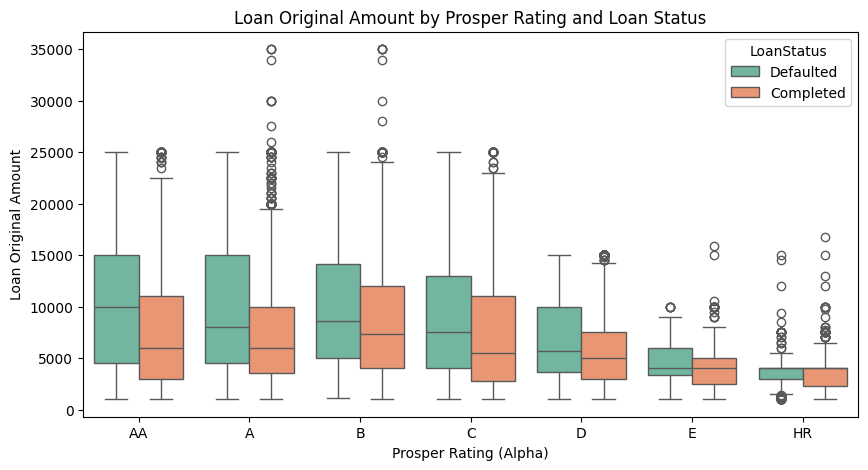

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of ProsperRating (Alpha)
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

# Figure size
fig, ax = plt.subplots(figsize=(10, 5))

# Box plot with ordered x-axis ticks
sns.boxplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus', palette='Set2', ax=ax, order=prosper_rating_order)

# Clarity
ax.set(xlabel='Prosper Rating (Alpha)', ylabel='Loan Original Amount', title='Loan Original Amount by Prosper Rating and Loan Status')

# Plot
plt.show()


## Interplay of Credit Category, Rating, and Outcome

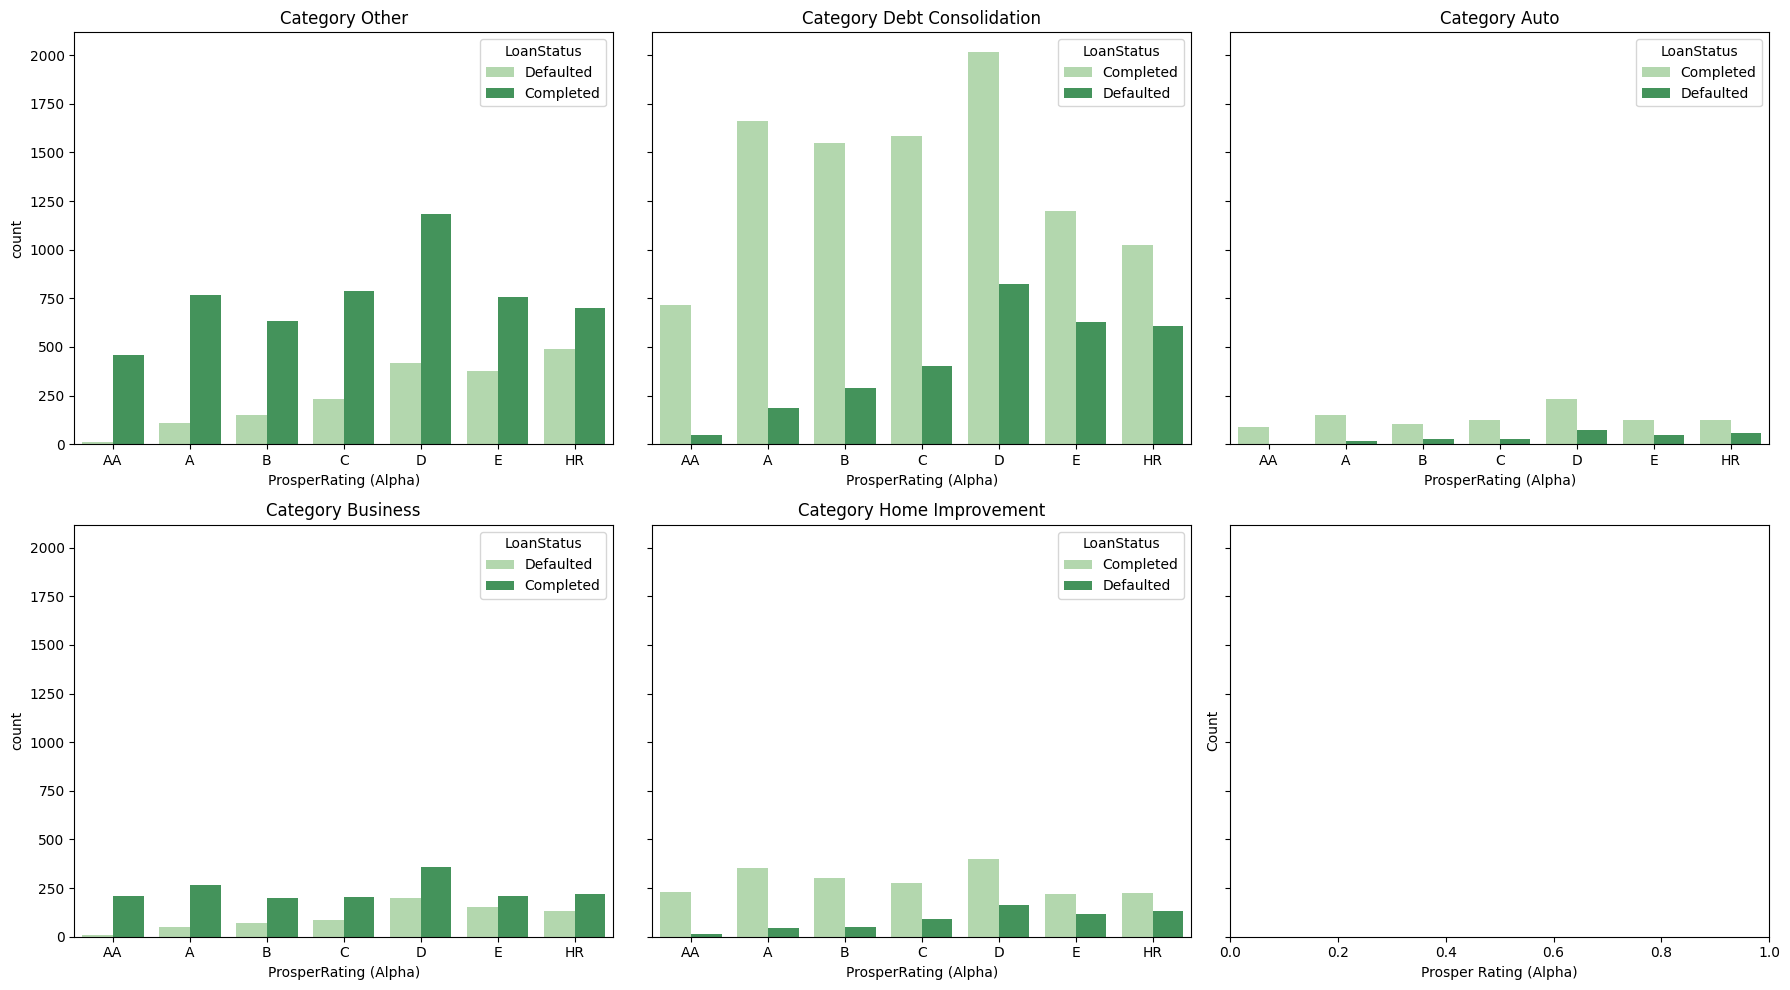

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the order of ProsperRating (Alpha)
prosper_rating_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']

# Figure size
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)

# ListingCategory values
unique_categories = target_df['ListingCategory (numeric)'].unique()

for i, category in enumerate(unique_categories):
    # Filter data
    subset_data = target_df[target_df['ListingCategory (numeric)'] == category]
    
    # Check if the current index exceeds the number of subplots
    if i >= len(axes.flatten()):
        break
    
    # Create a bar plot with ordered x-axis ticks
    sns.countplot(x='ProsperRating (Alpha)', hue='LoanStatus', data=subset_data, palette='Greens', ax=axes[i // 3, i % 3], order=prosper_rating_order)
    
    # Set title 
    axes[i // 3, i % 3].set_title(f'Category {category}')

# Labels and plot
plt.xlabel('Prosper Rating (Alpha)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


## Interaction of Amount, Listing Category, and Loan Status

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
# figure size
fig, ax = plt.subplots(figsize=(12, 8))
# grouped violin plot
sns.violinplot(x=target_df['ListingCategory (numeric)'], y=target_df['LoanOriginalAmount'], hue=target_df['LoanStatus'], palette='Reds', split=True, inner='quart', ax=ax)
# Set labels 
ax.set(xlabel='Listing Category (numeric)', ylabel='Loan Original Amount', title='Distribution of Loan Original Amount by Listing Category and Loan Status')
# plot
plt.show()

Insights:

1. Variability: Noteworthy variations are observed in one of the five examined graphs, indicating potential fluctuations.

2. Loan Size Trends: With the exception of the lowest ratings, defaulted credits generally exhibit larger amounts compared to completed credits.

3. Default Rate Consistency: Across different categories segmented by ratings, no substantial differences are noted in default rates.

4. Business Category Impact: The 'Business' category tends to be associated with larger loan amounts.

5. Loan Status Overview: Predominantly current loan statuses, indicating timely payments, Categorized past-due loans based on payment delay duration.

6. Employment Status Distribution: Majority of borrowers are employed. Notable representation of full-time employment.

7. Stated Monthly Income Analysis: Monthly income distribution reveals a right skew. Mode clusters around the $5000 mark.

8. Borrower APR and Rate Relationship: Positive correlation between Borrower APR and Rate.



### Relaitonships 
* Insight: Defaulted credits primarily originate from individuals with low Prosper ratings, while the Business category tends to have higher loan value.
### Acation 
* Significant: High Prosper-rated defaults generally involve larger amounts compared to completed credits.